In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from skimage import io
import matplotlib.pyplot as plt
import math
import pickle
import statistics
from statistics import mean
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import DSH
import matplotlib.pyplot as plt

In [94]:
video_time_length=60 #s
video_frame_numbers=1129 #frames
imgname='1120f_FUS_24h_condensate_speckle_BF_1min_#2_equator_dedrifted'
foldername='/Volumes/wwyyrx/Wenyun/Speckle/FUS_24h_condensate_speckle_BF_1min_#2_equator_dedrifted/'
framespeed=video_time_length/video_frame_numbers

In [95]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]

In [9]:
img[0][23][86]

210

# Averaging over pixels

In [276]:
# create matrix:
w=3
h=3
omega=w*h
matrix=np.zeros((w,h))
for i in range(0,w):
    for j in range(0,h):
        matrix[i][j]=1/omega

In [277]:
def compute_intensity(px, t_range, matrix):
    intensity=[]
    real_t= [element * framespeed for element in t_range]
    for t in t_range:
        kerneled_intensity=0
        start_y=px[0]-math.floor(matrix.shape[0]/2)
        start_x=px[1]-math.floor(matrix.shape[1]/2)
        for y_i in range(0,matrix.shape[1],1):
            for x_i in range(0,matrix.shape[1],1):
                y_pixel=start_y+y_i
                x_pixel=start_x+x_i
                kerneled_intensity=kerneled_intensity+matrix[y_i,x_i]*img[t][y_pixel,x_pixel]
        intensity_t=kerneled_intensity
        intensity.append(intensity_t)

    plt.figure(figsize=(8,5))
    #plt.ylim([0, 255])
    plt.plot(t_range,intensity,'-')
    plt.legend(['Intensity vs Time'], fontsize=18)
    plt.xlabel("Time [s]",fontsize=18)
    plt.ylabel("Intensity",fontsize=18)
    
    return intensity

In [278]:
def compute_g2t(px,laglist_g2t,t_range_g2t, matrix):
    max_num=laglist_g2t[-1]+t_range_g2t[-1]+1
    total_t_range=range(0,max_num,1)
    intensity=compute_intensity(px,total_t_range, matrix)
    g2t=[]
    
    for lagidx in laglist_g2t:
        numerator_sum=0
        denumerator_sum_1=0
        denumerator_sum_2=0
        for t in t_range_g2t:
            numerator_sum=numerator_sum+int(intensity[t])*int(intensity[t+lagidx])
            denumerator_sum_1=denumerator_sum_1+int(intensity[t])
            denumerator_sum_2=denumerator_sum_2+int(intensity[t+lagidx])
        numerator=numerator_sum/len(t_range_g2t)
        denumerator_1=denumerator_sum_1/len(t_range_g2t)
        denumerator_2=denumerator_sum_2/len(t_range_g2t)
        g2t.append((numerator/denumerator_1/denumerator_2)-1)
    return g2t, intensity

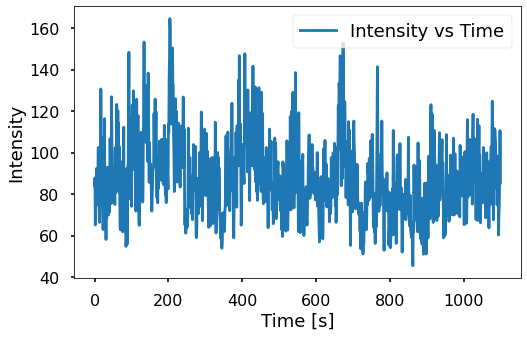

In [279]:
laglist_g2t=range(0,301,1)
t_range_g2t=range(0,800,1)
px=[120,145] #[y,x]
g2t,intensity=compute_g2t(px,laglist_g2t,t_range_g2t,matrix)

Text(0, 0.5, 'g2(t)')

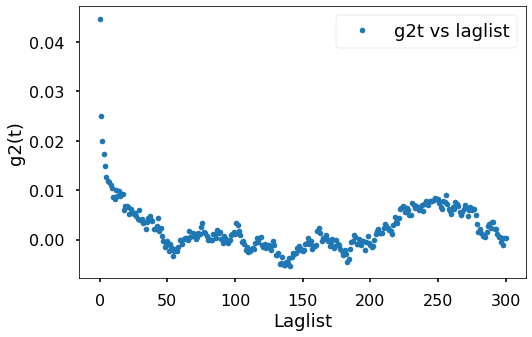

In [280]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)

In [281]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]

Text(0, 0.5, 'g2(t)')

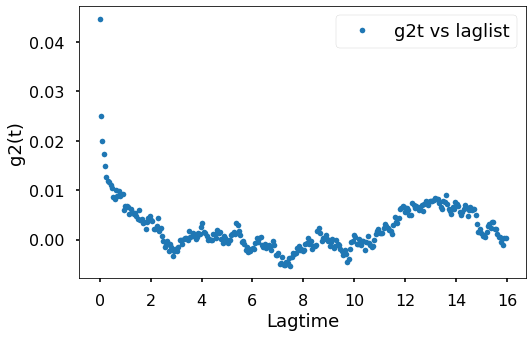

In [282]:
plt.figure(figsize=(8,5))
plt.plot(lagtime_g2t,g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Lagtime",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)

# FFT

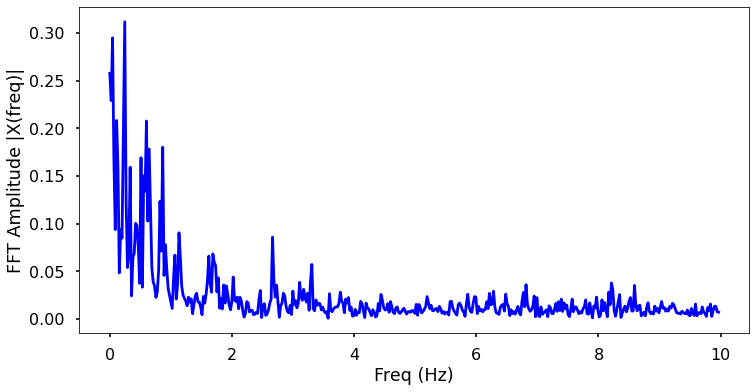

In [219]:
from numpy.fft import fft
X = fft(g2t)
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / 0.05
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

<ipython-input-214-b0c1e5347062>:2: RuntimeWarning: divide by zero encountered in true_divide
  t_second = 1/f_oneside


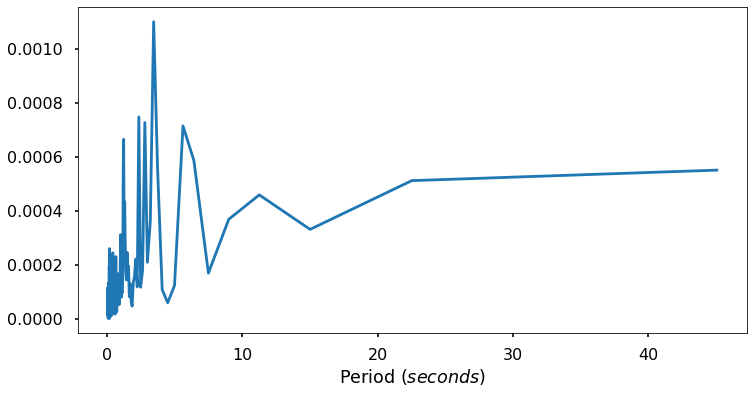

In [214]:
# convert frequency to hour
t_second = 1/f_oneside

plt.figure(figsize=(12,6))
plt.plot(t_second, np.abs(X[:n_oneside])/n_oneside)
plt.xlabel('Period ($seconds$)')
plt.show()

In [125]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

0.05
40


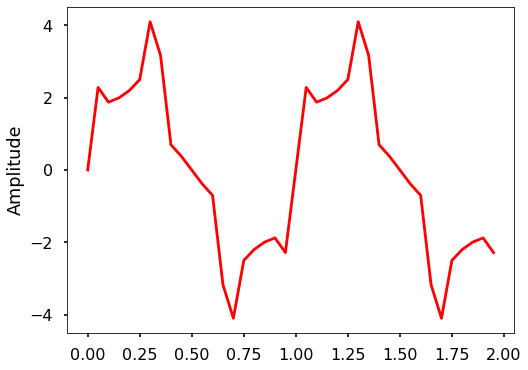

In [138]:
# sampling rate
sr = 20
# sampling interval
ts = 1.0/sr
print(ts)
t = np.arange(0,2,ts)
print(len(t))

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

<ipython-input-139-6004390dbd71>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, np.abs(X), 'b', \
/Users/wenyun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


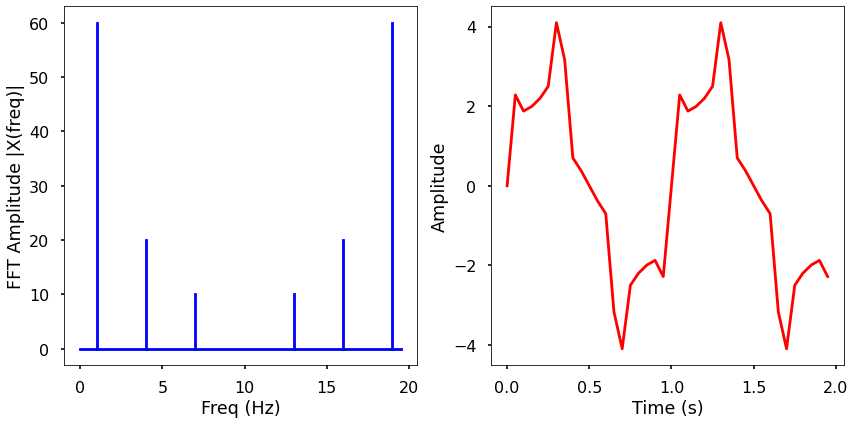

In [139]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()